In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('penguins.csv')

#Process incomplete data point
print(df.isna().sum())
df = df.dropna()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


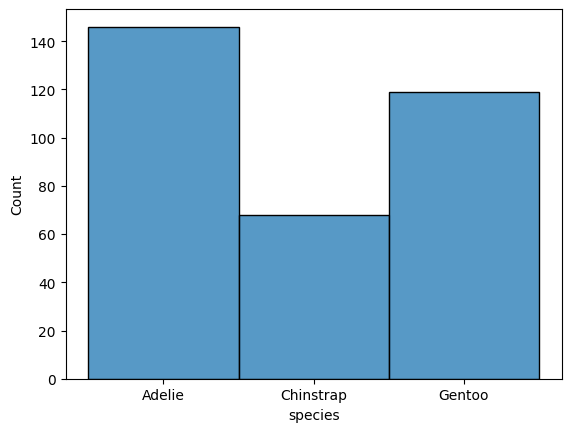

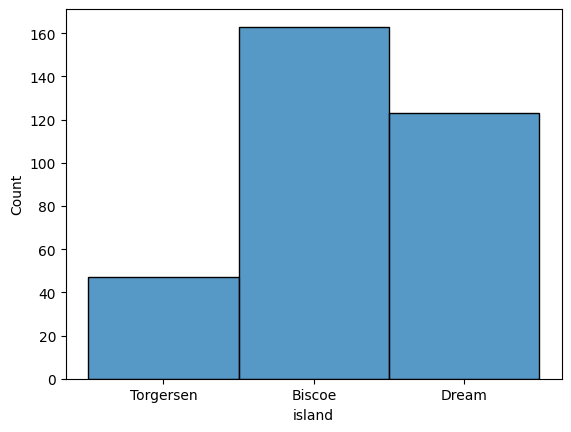

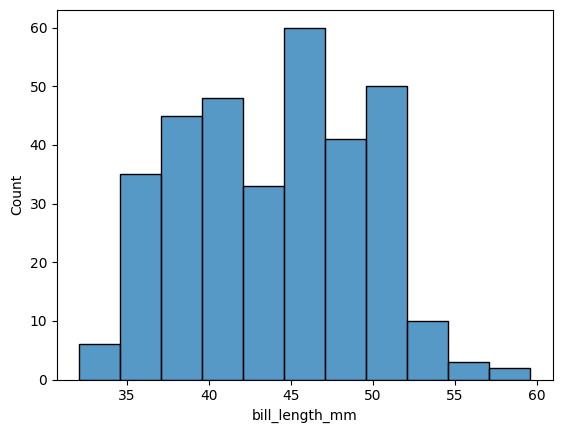

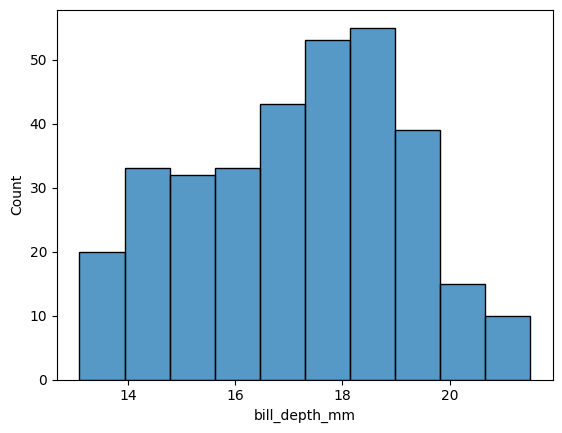

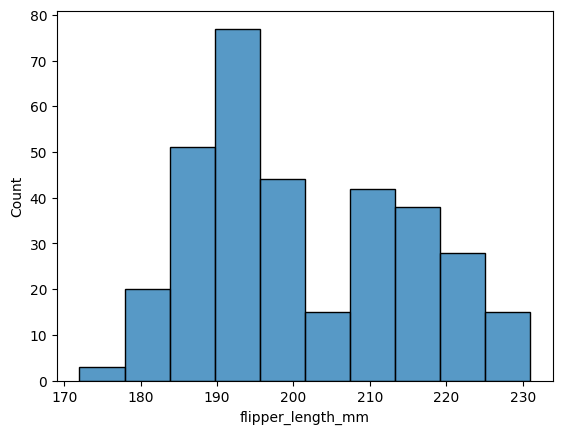

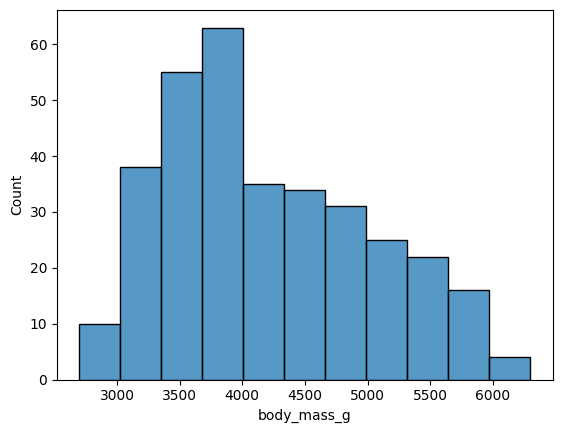

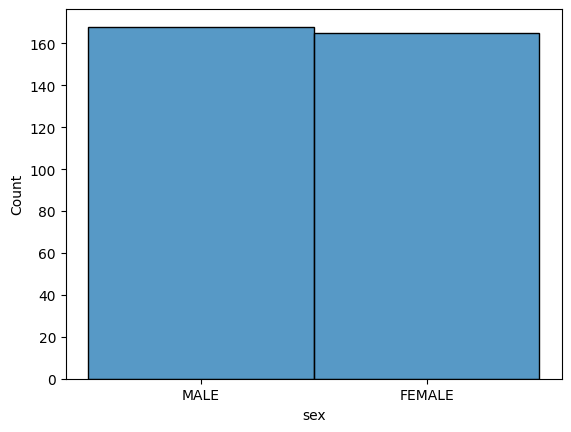

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#analyze the statistics of the target variable and each feature
print(df.describe())

# Histogram of the target variable
for column in df.columns:
    sns.histplot(data=df, x=column)
    plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

for text_column in ["species","island","sex"]:
    df[text_column] = LabelEncoder().fit_transform(df[text_column])

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

Maximum depth: 20, Least node sizes: 3, Train accuracy: 0.9839, Test accuracy: 0.9405


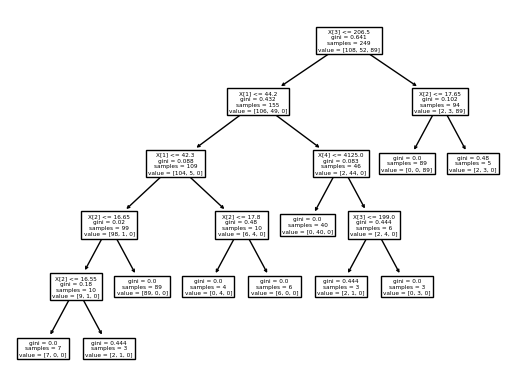

Maximum depth: 20, Least node sizes: 5, Train accuracy: 0.9759, Test accuracy: 0.9643


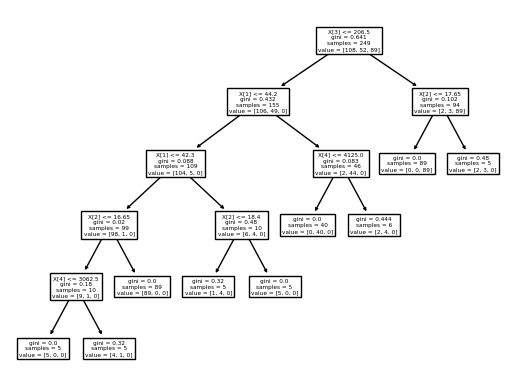

Maximum depth: 20, Least node sizes: 7, Train accuracy: 0.9558, Test accuracy: 0.9643


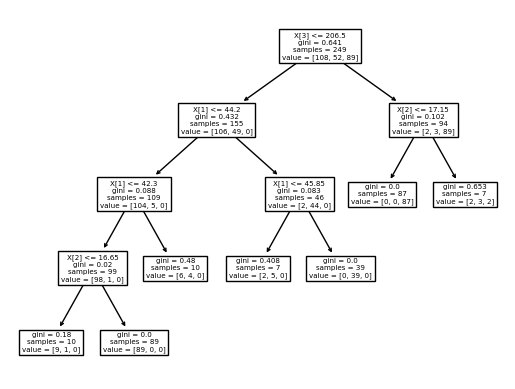

Maximum depth: 50, Least node sizes: 3, Train accuracy: 0.9839, Test accuracy: 0.9405


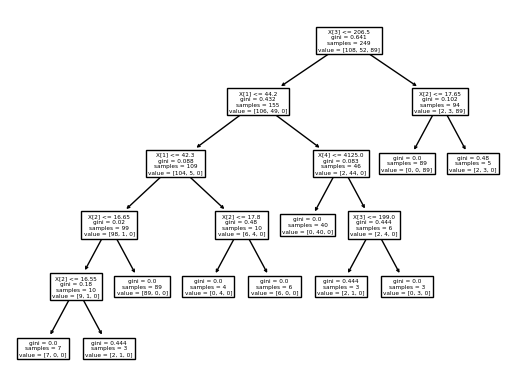

Maximum depth: 50, Least node sizes: 5, Train accuracy: 0.9759, Test accuracy: 0.9643


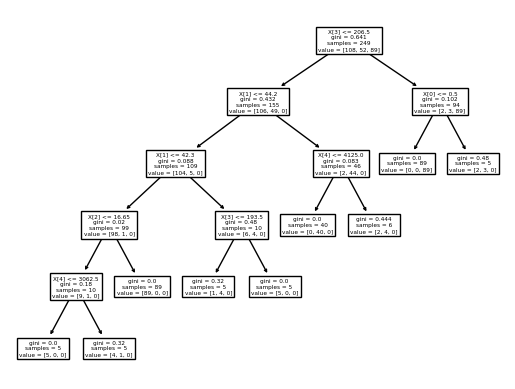

Maximum depth: 50, Least node sizes: 7, Train accuracy: 0.9558, Test accuracy: 0.9643


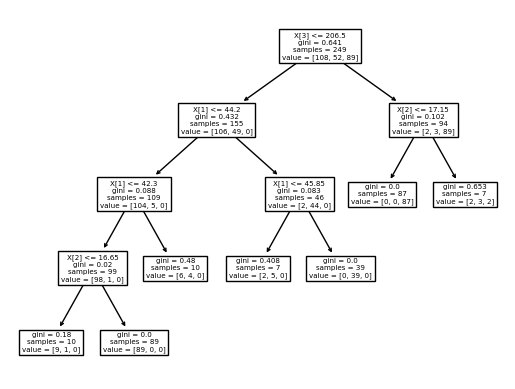

Maximum depth: 100, Least node sizes: 3, Train accuracy: 0.9839, Test accuracy: 0.9405


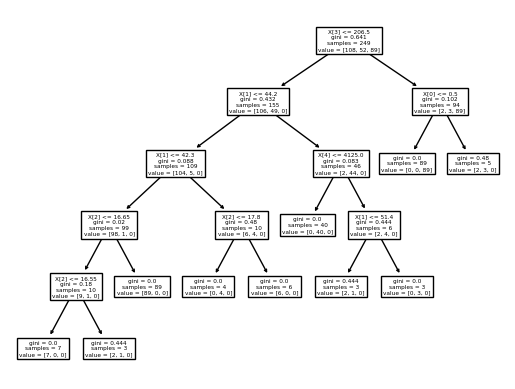

Maximum depth: 100, Least node sizes: 5, Train accuracy: 0.9759, Test accuracy: 0.9643


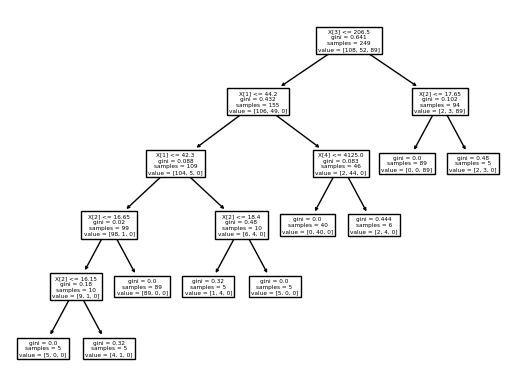

Maximum depth: 100, Least node sizes: 7, Train accuracy: 0.9558, Test accuracy: 0.9643


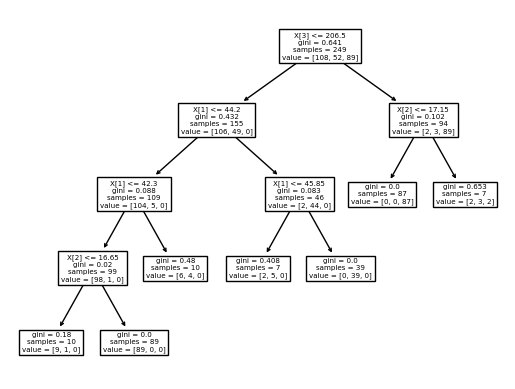

In [4]:
max_depths = [20, 50, 100]
min_samples_leafs = [3,5,7]

# Fit the models and evaluate their performance
for depth in max_depths:
    for leaf in min_samples_leafs:
        clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
        clf.fit(X_train, y_train)
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        print(f"Maximum depth: {depth}, Least node sizes: {leaf}, Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")
        plot_tree(clf)
        plt.show()

In [5]:
from sklearn.ensemble import BaggingClassifier

max_depths = [20, 50, 120]
trees_numbers = [3, 5, 7]

# Fit the models and evaluate their performance
for depth in max_depths:
    for trees in trees_numbers:
        base_learner = DecisionTreeClassifier(max_depth=depth)
        bc = BaggingClassifier(base_estimator=base_learner, n_estimators=trees)
        bc.fit(X_train, y_train)

        train_pred = bc.predict(X_train)
        test_pred = bc.predict(X_test)
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)

        print(f"depth: {depth}, number of trees: {trees}, Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")

depth: 20, number of trees: 3, Train accuracy: 1.0000, Test accuracy: 0.9881
depth: 20, number of trees: 5, Train accuracy: 1.0000, Test accuracy: 0.9881
depth: 20, number of trees: 7, Train accuracy: 0.9960, Test accuracy: 0.9762
depth: 50, number of trees: 3, Train accuracy: 1.0000, Test accuracy: 0.9881
depth: 50, number of trees: 5, Train accuracy: 0.9960, Test accuracy: 0.9762
depth: 50, number of trees: 7, Train accuracy: 1.0000, Test accuracy: 0.9762
depth: 120, number of trees: 3, Train accuracy: 1.0000, Test accuracy: 1.0000
depth: 120, number of trees: 5, Train accuracy: 1.0000, Test accuracy: 0.9643
depth: 120, number of trees: 7, Train accuracy: 1.0000, Test accuracy: 0.9881


In [6]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

tree_counts = [20,50,120]
m_features = [2,4,6]

for n_estimator in tree_counts:
    for m in m_features:
        rf = RandomForestClassifier(n_estimators=n_estimator, max_features=m)
        rf.fit(X_train, y_train)
        # print(rf.n_feature)
        train_pred = rf.predict(X_train)
        test_pred = rf.predict(X_test)
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)

        print(f"Tree numbers: {n_estimator}, Values of m: {m}, Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")

Tree numbers: 20, Values of m: 2, Train accuracy: 1.0000, Test accuracy: 1.0000
Tree numbers: 20, Values of m: 4, Train accuracy: 1.0000, Test accuracy: 0.9881
Tree numbers: 20, Values of m: 6, Train accuracy: 1.0000, Test accuracy: 0.9762
Tree numbers: 50, Values of m: 2, Train accuracy: 1.0000, Test accuracy: 1.0000
Tree numbers: 50, Values of m: 4, Train accuracy: 1.0000, Test accuracy: 0.9881
Tree numbers: 50, Values of m: 6, Train accuracy: 1.0000, Test accuracy: 0.9881
Tree numbers: 120, Values of m: 2, Train accuracy: 1.0000, Test accuracy: 1.0000
Tree numbers: 120, Values of m: 4, Train accuracy: 1.0000, Test accuracy: 1.0000
Tree numbers: 120, Values of m: 6, Train accuracy: 1.0000, Test accuracy: 0.9881


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.015059523809523809, 0.011428571428571429, 0.00994047619047619, 0.0075595238095238085, 0.009404761904761904, 0.008511904761904762, 0.00744047619047619, 0.008273809523809525, 0.007202380952380952, 0.006785714285714286]


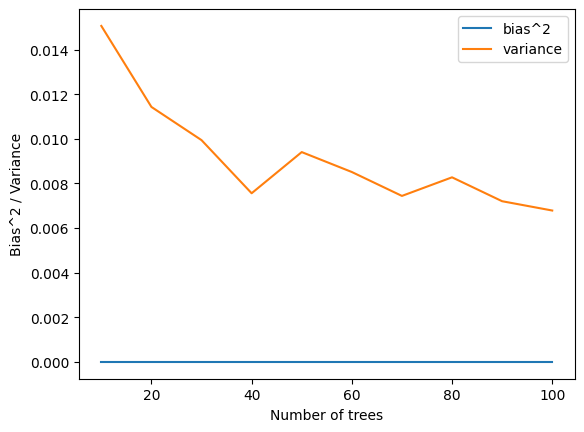

In [7]:
from mlxtend.evaluate import bias_variance_decomp

tree_nums = np.arange(10, 101, 10)
bias_list = []
var_list = []
for tree_num in tree_nums:
    rf_model = RandomForestClassifier(n_estimators=tree_num)
    loss, bias, var = bias_variance_decomp(rf_model, X_train.values, y_train.values, X_test.values, y_test.values)
    bias_list.append(bias**2)
    var_list.append(var)
print(bias_list)
print(var_list)
plt.plot(tree_nums, bias_list, label='bias^2')
plt.plot(tree_nums, var_list, label='variance')
plt.xlabel('Number of trees')
plt.ylabel('Bias^2 / Variance')
plt.legend()
plt.show()